In [40]:
import pandas as pd

df = pd.read_csv('football.csv')
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42645,2021-09-09,Colombia,Chile,3,1,FIFA World Cup qualification,Barranquilla,Colombia,False
42646,2021-09-09,Paraguay,Venezuela,2,1,FIFA World Cup qualification,Asunción,Paraguay,False
42647,2021-09-09,Uruguay,Ecuador,1,0,FIFA World Cup qualification,Montevideo,Uruguay,False
42648,2021-09-09,Argentina,Bolivia,3,0,FIFA World Cup qualification,Buenos Aires,Argentina,False


Check if any column is missing any date. retrun the number. df.dropna(inplace=True) can be used to delelete those linees. 

In [42]:
print(df.isna().sum())

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


How many Truples in the Dataset (number of Rows?)

In [43]:
len(df)

42650

How many unique tournaments names?

In [45]:
len(df.tournament.unique())

120

convert date to time stamps

In [49]:
df['date'] = pd.to_datetime(df['date'])
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42645,2021-09-09,Colombia,Chile,3,1,FIFA World Cup qualification,Barranquilla,Colombia,False
42646,2021-09-09,Paraguay,Venezuela,2,1,FIFA World Cup qualification,Asunción,Paraguay,False
42647,2021-09-09,Uruguay,Ecuador,1,0,FIFA World Cup qualification,Montevideo,Uruguay,False
42648,2021-09-09,Argentina,Bolivia,3,0,FIFA World Cup qualification,Buenos Aires,Argentina,False


How many review in 20218?

In [53]:
df['year'] = df['date'].dt.year
df[df['year'] == 2018]


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
39574,2018-01-02,Iraq,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,2018
39575,2018-01-02,Oman,Bahrain,1,0,Gulf Cup,Kuwait City,Kuwait,True,2018
39576,2018-01-05,Oman,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,2018
39577,2018-01-07,Estonia,Sweden,1,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
39578,2018-01-11,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
...,...,...,...,...,...,...,...,...,...,...
40477,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40478,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40479,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,2018
40480,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018


In [69]:
df.HomeTeam_score = df.home_score.values - df.away_score.values
Draws = (df.HomeTeam_score==0).sum()
Draws


9837

In [70]:
wins = (df.HomeTeam_score>=0).sum()
wins

30576

In [72]:
Loses = (df.HomeTeam_score<=0).sum()
Loses

21911

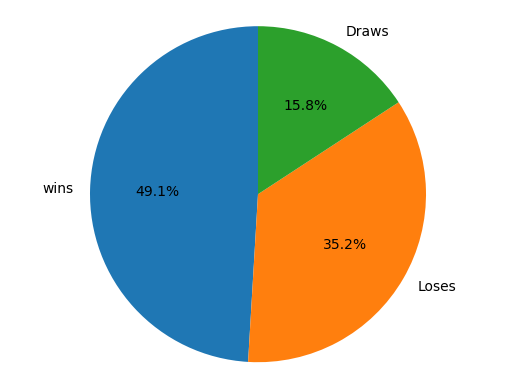

In [75]:
import matplotlib.pyplot as plt

Home_team_record = [wins, Loses, Draws]
labels = ['wins', 'Loses', 'Draws']

plt.pie(Home_team_record,labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

